# Predict Soccer Players with Regression

![Data Science Workflow](img/ds-workflow.png)

## Goal of Project
- Make a model to predict players overall rating based on metrics
- This is a subset of the Kaggle dataset [European Soccer Database](https://www.kaggle.com/hugomathien/soccer)
    - A bigger project is to predict outcomes of games

## Step 1: Acquire
- Explore problem
- Identify data
- Import data

### Step 1.a: Import libraries
- Execute the cell below (SHIFT + ENTER)

In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

### Step 1.b: Read the data
- Use ```pd.read_parquet()``` to read the file `files/soccer.parquet`
- NOTE: Remember to assign the result to a variable (e.g., ```data```)
- Apply ```.head()``` on the data to see all is as expected

In [19]:
data = pd.read_parquet('./files/soccer.parquet')
data.head()

,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
id,,,,,,,,,,,,,,,,,,,,,
1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,44.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


### Step 1.c: Data size
- HINT: `len(data)`

In [4]:
len(data)

183978

## Step 2: Prepare
- Explore data
- Visualize ideas
- Cleaning data

### Step 2.a: Inspect the data
- There are many metrics
- To keep it simple let's keep the numeric
    - HINT: find them with `.dtypes`
- You can select all columns of numeric data types as follows `.select_dtypes(include='number')`
    - HINT: assign all the numeric columns to your variable (this is needed for the model, as it does not understand non-numeric features).

In [5]:
data.dtypes

player_fifa_api_id       int64
player_api_id            int64
date                    object
overall_rating         float64
potential              float64
preferred_foot          object
attacking_work_rate     object
defensive_work_rate     object
crossing               float64
finishing              float64
heading_accuracy       float64
short_passing          float64
volleys                float64
dribbling              float64
curve                  float64
free_kick_accuracy     float64
long_passing           float64
ball_control           float64
acceleration           float64
sprint_speed           float64
agility                float64
reactions              float64
balance                float64
shot_power             float64
jumping                float64
stamina                float64
strength               float64
long_shots             float64
aggression             float64
interceptions          float64
positioning            float64
vision                 float64
penaltie

In [7]:
data.select_dtypes(include='number').head()

,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
id,,,,,,,,,,,,,,,,,,,,,
1,218353,505942,67.0,71.0,49.0,44.0,71.0,61.0,44.0,51.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,218353,505942,67.0,71.0,49.0,44.0,71.0,61.0,44.0,51.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
3,218353,505942,62.0,66.0,49.0,44.0,71.0,61.0,44.0,51.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
4,218353,505942,61.0,65.0,48.0,43.0,70.0,60.0,43.0,50.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
5,218353,505942,61.0,65.0,48.0,43.0,70.0,60.0,43.0,50.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


### Step 2.b: Check for null (missing) values
- Data often is missing entries - there can be many reasons for this
- We need to deal with that (will do later in course)
- Use ```.isnull().any()```
- See how many have null values (Assuming `data` contains your data)
```Python
data.isnull().sum()/len(data)*100
```

In [8]:
data.isnull().any()

player_fifa_api_id     False
player_api_id          False
date                   False
overall_rating          True
potential               True
preferred_foot          True
attacking_work_rate     True
defensive_work_rate     True
crossing                True
finishing               True
heading_accuracy        True
short_passing           True
volleys                 True
dribbling               True
curve                   True
free_kick_accuracy      True
long_passing            True
ball_control            True
acceleration            True
sprint_speed            True
agility                 True
reactions               True
balance                 True
shot_power              True
jumping                 True
stamina                 True
strength                True
long_shots              True
aggression              True
interceptions           True
positioning             True
vision                  True
penalties               True
marking                 True
standing_tackl

In [10]:
#calculate percentage of null data
data.isnull().sum()/len(data)*100

player_fifa_api_id     0.000000
player_api_id          0.000000
date                   0.000000
overall_rating         0.454402
potential              0.454402
preferred_foot         0.454402
attacking_work_rate    1.755645
defensive_work_rate    0.454402
crossing               0.454402
finishing              0.454402
heading_accuracy       0.454402
short_passing          0.454402
volleys                1.474633
dribbling              0.454402
curve                  1.474633
free_kick_accuracy     0.454402
long_passing           0.454402
ball_control           0.454402
acceleration           0.454402
sprint_speed           0.454402
agility                1.474633
reactions              0.454402
balance                1.474633
shot_power             0.454402
jumping                1.474633
stamina                0.454402
strength               0.454402
long_shots             0.454402
aggression             0.454402
interceptions          0.454402
positioning            0.454402
vision  

### Step 2.c: Drop missing data
- Remove rows with missing data
- HINT: `.dropna()`

In [20]:
data = data.dropna()

### Step 2.d: Visualize data
- Make a histogram of the `overall_rating`
- This gives you an understanding of the data
- What does it tell you?

<AxesSubplot:ylabel='Frequency'>

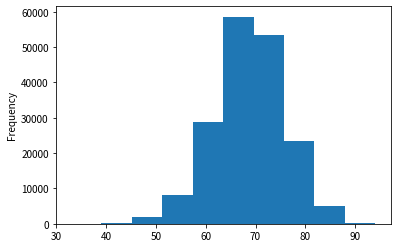

In [21]:
data['overall_rating'].plot.hist()

In [22]:
data['overall_rating'].describe()

count    180354.000000
mean         68.635317
std           7.027950
min          33.000000
25%          64.000000
50%          69.000000
75%          73.000000
max          94.000000
Name: overall_rating, dtype: float64

## Step 3: Analyze
- Feature selection
- Model selection
- Analyze data

### Step 3.a: Feature and target selection
- The target data is given by `overall_rating`
- As we do not have a description of the date, let's learn a bit about it
    - HINT: Use `data.corr()['overall_rating'].sort_values(ascending=False)`
- For simplicity de-select features you do not thing should be part of the analysis
- Create DataFrames `X` and `y` containing the features and target, respectively.
    - HINT: To get all columns except one use `.drop(['overall_rating', <insert other here>], axis=1)`
    - HINT: Keep `y` as a DataFrame for simplicity later

In [23]:
data.corr()['overall_rating'].sort_values(ascending=False)

overall_rating        1.000000
reactions             0.771856
potential             0.765435
short_passing         0.458243
ball_control          0.443991
long_passing          0.434525
vision                0.431493
shot_power            0.428053
penalties             0.392715
long_shots            0.392668
positioning           0.368978
volleys               0.361739
curve                 0.357566
crossing              0.357320
dribbling             0.354191
free_kick_accuracy    0.349800
finishing             0.330079
stamina               0.325606
aggression            0.322782
strength              0.315684
heading_accuracy      0.313324
jumping               0.258978
sprint_speed          0.253048
interceptions         0.249094
acceleration          0.243998
agility               0.239963
standing_tackle       0.163986
balance               0.160211
marking               0.132185
sliding_tackle        0.128054
gk_kicking            0.028799
gk_diving             0.027675
gk_posit

In [30]:
data = data.select_dtypes(include='number')
x = data.drop(['overall_rating', 'potential'], axis=1)
y = data['overall_rating']

### Step 3.b: Divide into test and train
- We do this to test the accuracy of our model
- The idea is: We train on one dataset, then test on another to see how it performs
- To split dataset use
```Python
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
```
- The `random_state=42` is used for reproducability

In [31]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42)

### Step 3.c: Train the model
- Create a Linear Regression instance and fit it.
- HINT: Do this on train data (`X_train` and `y_train`)

In [32]:
lin = LinearRegression()
lin.fit(X_train, y_train)

LinearRegression()

### Step 3.d: Predict on test data
- Here we make predictions
- HINT: Use your model to predict `.predict(X_test)` and assign the result to `y_pred`

In [33]:
y_pred = lin.predict(X_test)

### Step 3.e: Evaluate the model
- Apply r-squared on the predicted results and the real results
- HINT: Use `r2_score` on `y_pred` and `y_test`

In [34]:
r2_score(y_test, y_pred)

0.7883915544905804

## Step 4: Report
- Present findings
- Visualize results
- Credibility counts

### Step 4.a: Present finding
- This is more a practice of creating a model
- But feel free to be creative
- An option could be to investigate the best indicator of a player

## Step 5: Actions
- Use insights
- Measure impact
- Main goal